## Clasificación de imágenes

In [14]:
import os
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import random
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers


In [2]:
labels = os.listdir("PokemonData")
num = len(labels)
print(labels)

['Abra', 'Aerodactyl', 'Alakazam', 'Alolan Sandslash', 'Arbok', 'Arcanine', 'Articuno', 'Beedrill', 'Bellsprout', 'Blastoise', 'Bulbasaur', 'Butterfree', 'Caterpie', 'Chansey', 'Charizard', 'Charmander', 'Charmeleon', 'Clefable', 'Clefairy', 'Cloyster', 'Cubone', 'Dewgong', 'Diglett', 'Ditto', 'Dodrio', 'Doduo', 'Dragonair', 'Dragonite', 'Dratini', 'Drowzee', 'Dugtrio', 'Eevee', 'Ekans', 'Electabuzz', 'Electrode', 'Exeggcute', 'Exeggutor', 'Farfetchd', 'Fearow', 'Flareon', 'Gastly', 'Gengar', 'Geodude', 'Gloom', 'Golbat', 'Goldeen', 'Golduck', 'Golem', 'Graveler', 'Grimer', 'Growlithe', 'Gyarados', 'Haunter', 'Hitmonchan', 'Hitmonlee', 'Horsea', 'Hypno', 'Ivysaur', 'Jigglypuff', 'Jolteon', 'Jynx', 'Kabuto', 'Kabutops', 'Kadabra', 'Kakuna', 'Kangaskhan', 'Kingler', 'Koffing', 'Krabby', 'Lapras', 'Lickitung', 'Machamp', 'Machoke', 'Machop', 'Magikarp', 'Magmar', 'Magnemite', 'Magneton', 'Mankey', 'Marowak', 'Meowth', 'Metapod', 'Mew', 'Mewtwo', 'Moltres', 'MrMime', 'Muk', 'Nidoking', 'Ni

In [3]:
stored = {}
def input_target_split(train_dir,labels):
    dataset = []
    count = 0
    for label in labels:
        folder = os.path.join(train_dir,label)
        for image in os.listdir(folder):
            
#             print(os.path.join(folder,image))
            try:
                img=load_img(os.path.join(folder,image), target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                dataset.append((img,count))
            except:
                pass

        print(f'\rCompleted: {label}',end='')
        stored[label] = count
        count+=1
    random.shuffle(dataset)
    X, y = zip(*dataset)
    
    return np.array(X),np.array(y)

In [4]:
X, y = input_target_split("PokemonData", labels)

Completed: Zubatstuffdslash

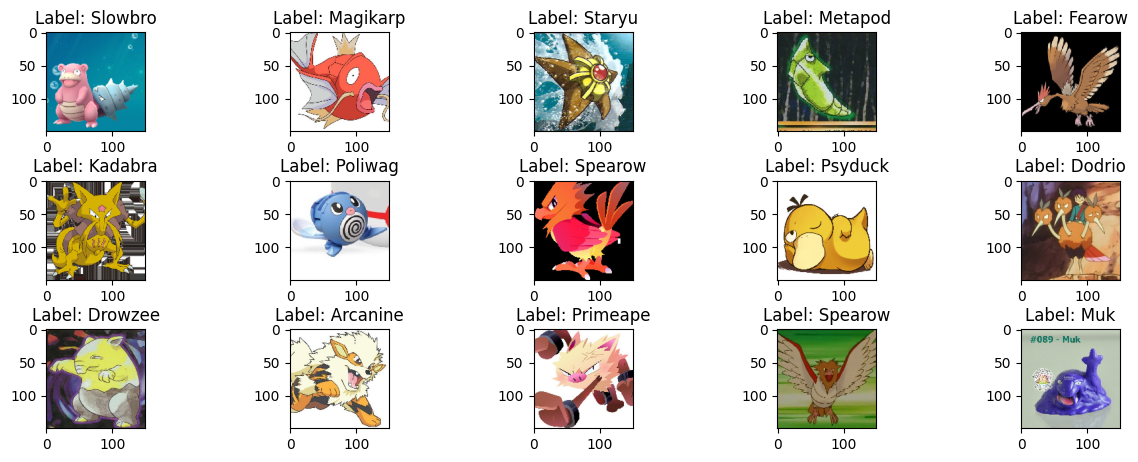

In [5]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(15):
    n+=1
    plt.subplot(5 , 5, n)
    plt.subplots_adjust(hspace = 0.5 , wspace = 0.3)
    plt.imshow(X[i])
    plt.title(f'Label: {labels[y[i]]}')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
print(np.unique(y_train,return_counts=True),np.unique(y_test,return_counts=True))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149]), array([20, 23, 21, 32, 26, 27, 31, 21, 29, 35, 27, 20, 22, 31, 27, 36, 32,
       29, 31, 32, 26, 30, 26, 31, 23, 21, 29, 35, 18, 28, 35, 24, 26, 32,
       34, 33

In [7]:
datagen = ImageDataGenerator(horizontal_flip=True,
                             vertical_flip=True,
                             rotation_range=20,
                             zoom_range=0.2,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             shear_range=0.1,
                             fill_mode="nearest")

testgen = ImageDataGenerator()

datagen.fit(X_train)
testgen.fit(X_test)

In [8]:
y_train = np.eye(num)[y_train]
y_test = np.eye(num)[y_test]

In [9]:
from tensorflow.keras.applications import DenseNet201

img_size = 150
base_model = DenseNet201(include_top = False,
                         weights = 'imagenet',
                         input_shape = (img_size,img_size,3))

for layer in base_model.layers[:675]:
    layer.trainable = False

for layer in base_model.layers[675:]:
    layer.trainable = True

74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [17]:
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(num, activation=tf.nn.softmax)
]) 

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hist = model.fit(datagen.flow(X_train,y_train,batch_size=32),
                                        validation_data=testgen.flow(X_test,y_test,batch_size=32),
                                        epochs=50)

 215/4777 ━━━━━━━━━━━━━━━━━━━━ 50:18 662ms/step - accuracy: 0.0093 - loss: 5.3827

KeyboardInterrupt: 

In [ ]:
y_pred = model.predict(X_test)
pred = np.argmax(y_pred,axis=1)
print(pred)

In [ ]:
ground = np.argmax(y_test,axis=1)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ground,pred,target_names = labels))

In [ ]:
y_pred

In [ ]:
y_pred = np.argmax(y_pred,axis=1)
y_pred

In [ ]:
y_true = np.argmax(y_test,axis=1)
y_true

In [ ]:
plt.figure(figsize = (15 , 9))
n = 0
for i in range(len(X_test)):
    if y_pred[i] != y_true[i]:
        n+=1
        if n <= 25:
            plt.subplot(5 , 5, n)
            plt.subplots_adjust(hspace = 0.8 , wspace = 0.3)
            plt.imshow(X_test[i])
            plt.title(f'Actual: {labels[y_true[i]]}\nPredicted: {labels[y_pred[i]]}')